In [3]:
import sklearn
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X,y= make_circles(n_samples, noise=0.03,random_state=42)




In [5]:
len(X),len(y)

(1000, 1000)

In [6]:
print(f"First 5 samples of X:{X[:5]}")

print(f"First 5 samples of y:{y[:5]}")

First 5 samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:[1 1 1 1 0]


In [7]:
# make dataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2": X[:,1], "label": y })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


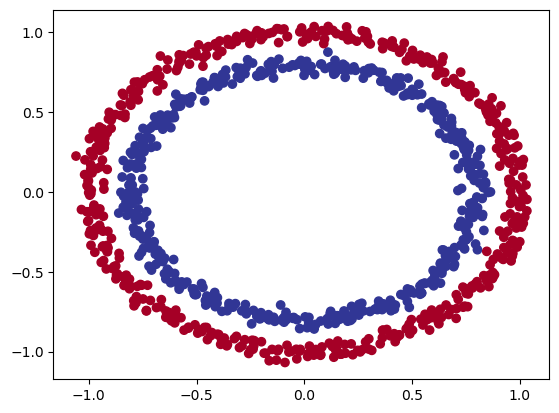

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x= X[:,0], y=X[:,1],c=y, cmap=plt.cm.RdYlBu)

Note: The data we're working with is often referred to as a toy dataset, a dataset that is amall enough to experiment but still sizeable enough to practice the fundamentals.

In [9]:
X.shape

(1000, 2)

In [10]:
y.shape

(1000,)

In [11]:
X_sample = X[0]
y_sample = y[0]

print(f"values for one sample of X: {X_sample} and the same of y:{y_sample} ")
print(f"shape X:{X_sample.shape} and y:{y_sample.shape} ")

values for one sample of X: [0.75424625 0.23148074] and the same of y:1 
shape X:(2,) and y:() 


In [12]:
# Turn data into tensors
import torch
torch.__version__

'1.13.0'

In [13]:
type(X)

numpy.ndarray

In [14]:
X.dtype

dtype('float64')

In [15]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [16]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [20]:
n_samples

1000

# Building a model

Let's build a model to classify our blue and red dots

To do so, we want to :
1. Setup device agonistic code so our code will run on our accelerator (GPU) if there is one
2. Construct a model (by subclassing 'nn.Module')
3. Define a loss function and optimizer
4. Create a training and test loop


In [21]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [22]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code , let's create a model that:

1. Subclasses 'nn.Module' ( almost all models in PyTorch subclass in 'nn.Module')
2. Create 2 'nn.Linear' layers that are capable of handling the shapes of our data
3. Defines a 'forward()' method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [23]:
# Construct a model that sbclasses nn.Module

# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # 2 create 2 nn.Linear layers capable of handling the shapes of our data
#         self.layer_1 = nn.Linear(in_features=2,out_features=5) # takes in 2 features and upscale to 5 features
#         self.layer_2 = nn.Linear(in_features=5,out_features=1) # takes in 5 features from previous layers and outputs a single layer(same shape as y)

#         # self.two_linear_layer = nn.Sequential(
#         #     nn.Linear(in_features=2,out_features=5),
#         #     nn.Linear(in_features=5,out_features=2)
#         # )

# # defina forward() method that outlines the forward pass
#     def forward(self,x):
#         return self.layer_2(self.layer_1(x))
#         # return two_linear_layer(x)

#     #4 instantiate an instance   of our model class and send it the target device

# model_0 = CircleModelV0().to(device)
# model_0

In [24]:
device

'cuda'

In [25]:
# next(model_0.parameters()).device

In [26]:
# Let's replicate the model above us nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3437, -0.1559],
                      [ 0.2844, -0.1284],
                      [-0.6110, -0.4264],
                      [ 0.4920,  0.4677],
                      [-0.0015,  0.6593]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5249,  0.1390, -0.1842, -0.0891, -0.0362], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0488,  0.2008,  0.0949,  0.2922,  0.1573]], device='cuda:0')),
             ('1.bias', tensor([-0.4100], device='cuda:0'))])

In [28]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"length of predictions: {len(untrained_preds)}, Shape:{untrained_preds.shape} ")
print(f"length of test samples:{len(X_test)}, shape:{X_test.shape } ")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nfirst 10 labels:\n{y_test[:10]}")


length of predictions: 200, Shape:torch.Size([200, 1]) 
length of test samples:200, shape:torch.Size([200, 2]) 

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-0.]], device='cuda:0')

first 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [29]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

# Setup loss function and optimizer

2.1 Setup loss function and optimizer

We've setup a loss (also called a criterion or cost function) and optimizer before in notebook 01.

But different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, torch.optim.SGD()) can be used for a range of problems, so can too the Adam optimizer (torch.optim.Adam()).




In [30]:
#setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn =nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [31]:
# Calculate accuracy - out of 100 examples what percentage does our model gets right?
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

# Train a model
To train our model, we're going to need to build a training loop

1. Forward pass
2. Calculate a loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimizer(gradient descent)

## Going from raw logits => prediction possibilities => prediction labels

our model outputs are going to be raw **logits**.

We can convert these **logits** into  prediction possibilites by passing them to some kind of activation function(e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax().

In [32]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [33]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3927],
        [-0.2800],
        [-0.6262],
        [-0.3267],
        [-0.5280]], device='cuda:0')

In [34]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [35]:
# use the sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4031],
        [0.4305],
        [0.3484],
        [0.4190],
        [0.3710]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_preds_probs` >= 0.5, `y=1` (class 1)
* `y_preds_probs` < 0.5, `y=0` (class 0 )

In [36]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred probs -> pred labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(),y_preds_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [37]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [38]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

Build a training and testing loop

In [39]:
torch.manual_seed(42)

#epochs
epochs = 100

# Put data to target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


for epoch in range(epochs):
    model_0.train()


    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits => pred probs => pred labels


    #calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits,y_train))
    
    loss = loss_fn(y_logits,y_train) # nn.BCEWithLogitLoss expect few roy logistics input 

    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)



    optimizer.zero_grad()


    loss.backward()

    optimizer.step()
    

    model_0.eval()

    with torch.inference_mode():
        test_logits =model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))


        test_loss = loss_fn(test_logits,y_test)

        test_acc = accuracy_fn(y_true=y_test,y_pred = test_pred)


    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc:{acc:.5f} | Test loss:{test_loss:.5f}, test_acc:{test_acc:.2f}% ")


Epoch:0 | Loss:0.72085, Acc:50.00000 | Test loss:0.72416, test_acc:50.00% 
Epoch:10 | Loss:0.70645, Acc:50.00000 | Test loss:0.71042, test_acc:50.00% 
Epoch:20 | Loss:0.69954, Acc:50.00000 | Test loss:0.70361, test_acc:50.00% 
Epoch:30 | Loss:0.69621, Acc:44.12500 | Test loss:0.70015, test_acc:42.00% 
Epoch:40 | Loss:0.69460, Acc:44.87500 | Test loss:0.69832, test_acc:47.00% 
Epoch:50 | Loss:0.69382, Acc:47.87500 | Test loss:0.69729, test_acc:47.00% 
Epoch:60 | Loss:0.69344, Acc:49.25000 | Test loss:0.69667, test_acc:47.00% 
Epoch:70 | Loss:0.69324, Acc:49.12500 | Test loss:0.69626, test_acc:47.50% 
Epoch:80 | Loss:0.69314, Acc:49.87500 | Test loss:0.69596, test_acc:46.00% 
Epoch:90 | Loss:0.69308, Acc:50.12500 | Test loss:0.69574, test_acc:46.50% 


# Make predictions and evaluate the model

from the metrics it looks like our model isn't learning anything

so to inspect it let's make some predictinos and make them visual!!

In other words, "Visualize,isualize,visualize"

To do so, we're going to import a function called `plot_decision_boundary`


In [40]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not downloaded

request = "../Pytorch/helper_functios.py"

In [41]:
from helper_functions import plot_predictions,plot_decision_boundary

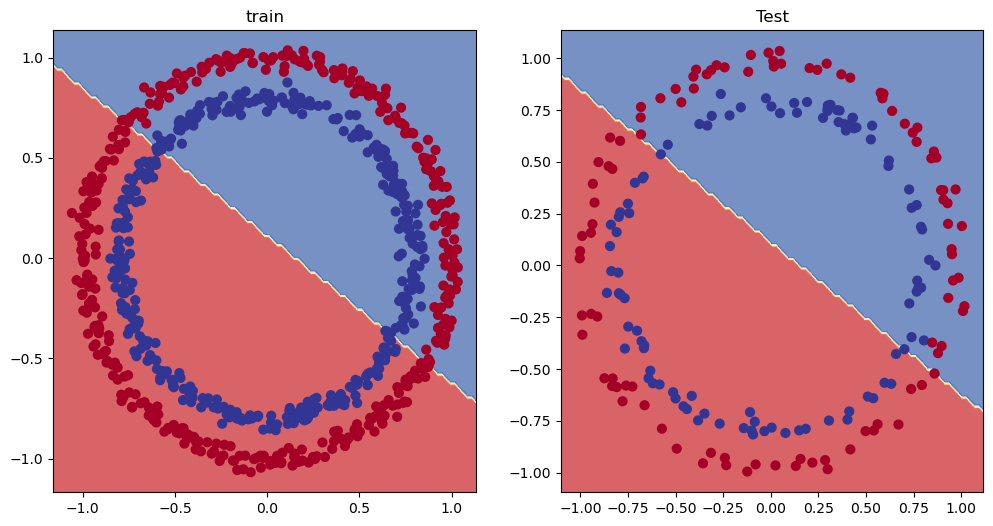

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

### 5. Improving a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
*  Fit for longer
* Changing the activation functions
* change the learning rate
* change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we ( as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**

Let's try and improve our model by:
* Adding more hidden units: 5 => 10
* Increase the number of layers: 2=>
* Increase the number of epochs 100 => 1000

In [43]:
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]], device='cuda:0')

In [45]:
y_train[:5]

tensor([1., 0., 0., 0., 1.], device='cuda:0')

In [46]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)

    def forward(self,x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # or
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed up where possible behind the scenes


model_1 = CircleModelV1().to(device)
model_1
        

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)